## **Importing Liberaries & Dataset**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/modyreturn/Health_Care_Analysis/refs/heads/master/merged_data.csv"

df = pd.read_csv(url)

df.head()


,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group
0,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
1,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
2,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,9-12 Months,1,Inpatient,Other
3,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other
4,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other


## **Cleaning The Data**

In [17]:
# converting Archive_Date to datetime
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df['Year'] = df['Archive_Date'].dt.year
df['Month_Name'] = df['Archive_Date'].dt.month_name()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452991 entries, 0 to 452990
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Archive_Date     452991 non-null  datetime64[ns]
 1   Specialty_HIPE   452800 non-null  float64       
 2   Specialty_Name   452991 non-null  object        
 3   Adult_Child      452991 non-null  object        
 4   Age_Profile      452816 non-null  object        
 5   Time_Bands       452989 non-null  object        
 6   Total            452991 non-null  int64         
 7   Case_Type        452991 non-null  object        
 8   Specialty Group  452991 non-null  object        
 9   Year             452991 non-null  int32         
 10  Month_Name       452991 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 36.3+ MB


In [18]:
df['Time_Bands'] = df['Time_Bands'].str.strip()
df['Age_Profile'] = df['Age_Profile'].str.strip()

In [ ]:
# I will use the following func to format the values on axis of the charts as needed
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply formatter to the current plot
formatter = FuncFormatter(millions_formatter)

In [137]:
# here you can categorise and order Month_Name to plot
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## **Exploratory Data Analysis (EDA):**

### **Statistic Summary**

In [19]:
# using describe() to get statistic summary for the data
df.describe(include=('all'))

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group,Year,Month_Name
count,452991,452800.000000,452991,452991,452816,452989,452991.000000,452991,452991,452991.000000,452991
unique,NaN,NaN,78,3,3,8,NaN,3,27,NaN,12
top,NaN,NaN,General Surgery,Adult,16-64,0-3 Months,NaN,Outpatient,General,NaN,March
freq,NaN,NaN,43634,368151,203354,93818,NaN,270281,76614,NaN,47110
mean,2019-09-09 18:57:46.892720640,2619.144576,NaN,NaN,NaN,NaN,54.390059,NaN,NaN,2019.181778,NaN
min,2018-01-31 00:00:00,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2018.000000,NaN
25%,2018-10-31 00:00:00,1300.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,2018.000000,NaN
50%,2019-08-31 00:00:00,1900.000000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,2019.000000,NaN
75%,2020-06-30 00:00:00,2600.000000,NaN,NaN,NaN,NaN,53.000000,NaN,NaN,2020.000000,NaN
max,2021-03-31 00:00:00,9000.000000,NaN,NaN,NaN,NaN,4239.000000,NaN,NaN,2021.000000,NaN


### **Cases Over Time:**
-   Now let's analyze Day Cases, Inpatient Cases, and Outpatient Cases over time.




In [20]:
cases_over_time = df.groupby(['Month_Name', 'Case_Type'])['Total'].sum().reset_index()
cases_over_time['Month_Name'] = cases_over_time['Month_Name'].str[:3] # to abbreviate the month name to the first 3 letters

cases_over_time.head()

,Month_Name,Case_Type,Total
0,Apr,Day Case,168396
1,Apr,Inpatient,67712
2,Apr,Outpatient,1626611
3,Aug,Day Case,156239
4,Aug,Inpatient,64058


In [21]:
# here you can categorise and order Month_Name to plot
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cases_over_time['Month_Name'] = pd.Categorical(cases_over_time['Month_Name'], categories=month_order, ordered=True)

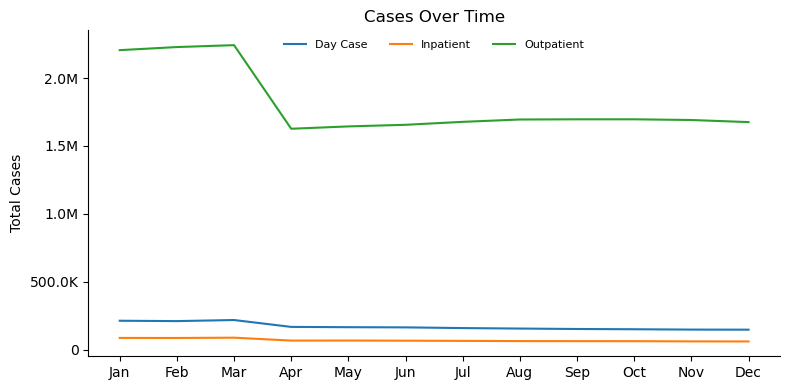

In [ ]:
plt.figure(figsize=(8, 4))

sns.lineplot(
    data=cases_over_time,
    x='Month_Name',
    y='Total',
    hue='Case_Type',
    palette='tab10'
)


plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Cases Over Time')
plt.xlabel('')
plt.ylabel('Total Cases')
plt.legend(ncols=3, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()


**Key Insights:**

-   Outpatient Cases
    - Outpatient volumes are **significantly higher** than other case types.
    - There is a **sharp decline between March and April**, followed by a stable trend.
    

-   Day Case
    - Relatively stable across the year with a small dip in April, which mirrors the outpatient drop (but on a smaller scale).

    -   This may suggest a system-wide effect in April (e.g., hospital capacity issues or a public holiday period)..


-   Inpatient Cases
    - Lowest and **most stable** volume.
    - Very minimal month-to-month variation — this could indicate inpatient services are less affected by external factors or operate on a constant baseline.

    ---




### **Cases Type Distributions:**
-   Let's see the distributions of Case Types

In [23]:
case_type_distribution = df['Case_Type'].value_counts().reset_index()
case_type_distribution.columns = ['Case_Type', 'Count']

case_type_distribution

,Case_Type,Count
0,Outpatient,270281
1,Day Case,110487
2,Inpatient,72223


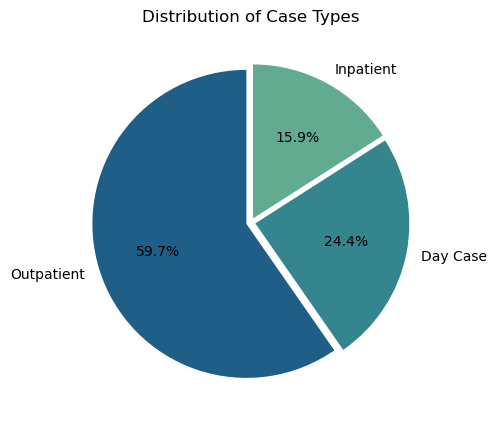

In [24]:
# Define the explode tuple dynamically
explode = [0.03] * len(case_type_distribution)

plt.figure(figsize=(10, 5))
plt.pie(
    case_type_distribution['Count'],
    labels=case_type_distribution['Case_Type'],
    colors=sns.color_palette('crest_r', n_colors=len(case_type_distribution)),
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)

plt.title("Distribution of Case Types")
plt.show()

**Key Insights**

-   Outpatient
    - Represents the **majority** of cases: **59.7%**.
    - Highlights the **dominance of non-admitted consultations** in the healthcare activity mix.
    - Indicates a likely emphasis on **preventive care, follow-ups, or minor procedures**.

-   Day Case
    - Accounts for **24.4%** of total cases.
    - Suggests a **significant number of procedures are performed without overnight stays**.
    - Could be optimized further if infrastructure and patient conditions allow.

-   Inpatient
    - Comprises only **15.9%** of the cases.
    - Indicates that **fewer cases require overnight hospitalization**, possibly due to efficiency or a lower acuity patient population.
    - Helps reduce overall healthcare costs and resource strain.

---


### **Specialty Analysis:**
-   Let's se what is the top 10 specialties in the dataset:

In [25]:
#specialty_df = df.groupby(['Specialty_Name', 'Case_Type'])['Total'].sum().reset_index()
specialty_df = df.groupby('Specialty_Name')['Total'].sum().reset_index().head(10).sort_values(by='Total', ascending=False)

specialty_df

,Specialty_Name,Total
4,Cardiology,1100604
2,Breast Surgery,156736
8,Clinical Immunology,128125
7,Clinical (Medical) Genetics,109024
1,Anaesthetics,78000
9,Clinical Neurophysiology,56326
3,Cardio-Thoracic Surgery,31037
0,Accident & Emergency,6004
5,Chemical Pathology,2891
6,Child/Adolescent Psychiatry,2391


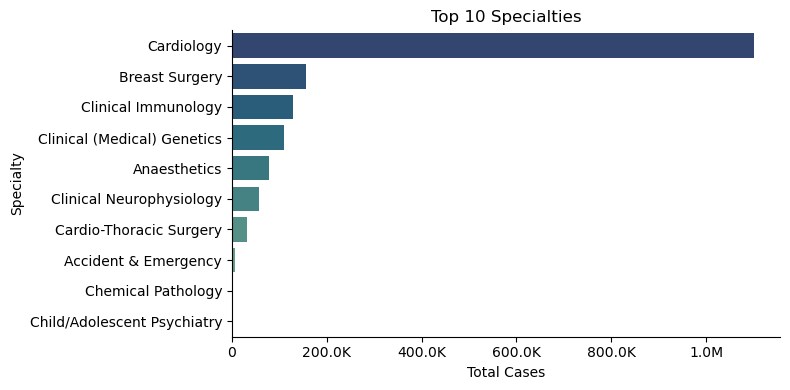

In [26]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=specialty_df,
    y='Specialty_Name',
    x='Total',
    palette='crest_r'
)

# function to format the values on the yaxis
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply formatter to the current plot
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Specialties')
plt.xlabel('Total Cases')
plt.ylabel('Specialty')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights**

-   Cardiology:
    - Dominates the chart with **over 1 million cases**.
    - Indicates high demand for heart-related services.
    - Suggests the need for continued investment in **cardiac care infrastructure and staff**.

-   Breast Surgery & Clinical Immunology:
    - Each has over **100K cases**.
    - Reflects strong demand in **oncology and immune-related conditions**.

-   Clinical (Medical) Genetics:
    - High volume indicates rising interest in **genomic medicine**.

-   Anaesthetics & Clinical Neurophysiology:
    - Essential support specialties with **significant case volumes**.
    - Central to surgical and neurological diagnostic care.

-   Cardio-Thoracic Surgery
    - Lower in volume than Cardiology, likely due to its **specialized nature**.

-   Accident & Emergency
    - Lower than expected—possibly due to data scope or triage protocols.

-   Chemical Pathology & Child/Adolescent Psychiatry
    - Critical for diagnostics and mental health support.
    - Smaller totals, but still among the top 10.

---


In [39]:
specialty_group = df.groupby('Specialty Group')['Total'].sum().reset_index().head(10).sort_values(by='Total', ascending=False)
specialty_group.head(5)


,Specialty Group,Total
1,Bones,3872040
8,ENT,3164343
9,Eyes,2018252
2,Brain,1159445
5,Cosmetic,769540


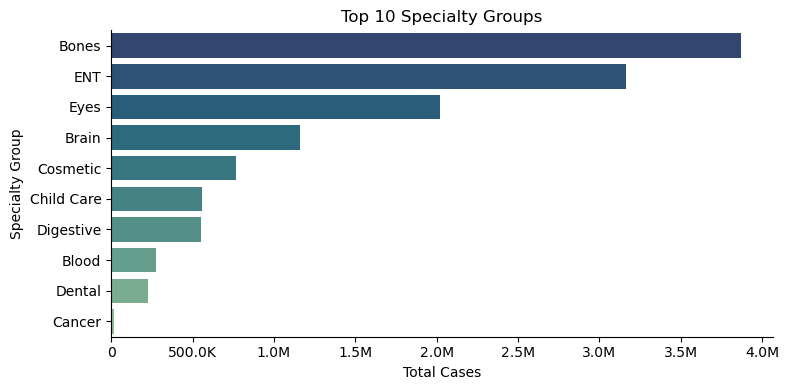

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=specialty_group,
    y='Specialty Group',
    x='Total',
    palette='crest_r'
)

# formatting the xaxis values
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Specialty Groups')
plt.xlabel('Total Cases')
plt.ylabel('Specialty Group')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights**

1. Bones
    - **Highest total cases**, approaching **4 million**.
    - Indicates high demand for **orthopedic services**, likely due to aging populations or injury recovery needs.

2. ENT (Ear, Nose, Throat)
    - Second highest, with **over 3 million cases**.
    - Reflects widespread and frequent ENT conditions across all age groups.

3. Eyes
    - Nearly **2 million cases**.
    - Emphasizes the importance of **ophthalmologic care**, possibly including cataracts, vision correction, and screenings.

4. Brain
    - Around **1.3 million cases**.
    - Points to a strong volume in **neurology and neurosurgery**.

5. Cosmetic
    - Over **800K cases**, indicating **high elective demand** for aesthetic procedures.

6. Child Care
    - Close to Cosmetic in volume, showing ongoing focus on **pediatric care**.

7. Digestive
    - Over **600K cases**.
    - Suggests steady attention to **gastrointestinal health**.

8. Blood
    - Moderate volume (~400K), consistent with **hematology and related diagnostics**.

9. Dental
    - Slightly behind Blood.
    - Shows measurable demand for **oral health services**.

10. Cancer
    - Although lowest in this top 10, still significant.
    - May reflect data capture limits or separation into specific subspecialties (e.g., oncology types).

---

### **Age Profiling:**
-   Let's see the total of cases by age profile


In [29]:
df['Age_Profile'].unique()

array(['16-64', '65+', '0-15', nan], dtype=object)

In [30]:
age_df = df.groupby('Age_Profile')['Total'].sum().reset_index()
age_df

,Age_Profile,Total
0,0-15,3502498
1,16-64,15095747
2,65+,6039484


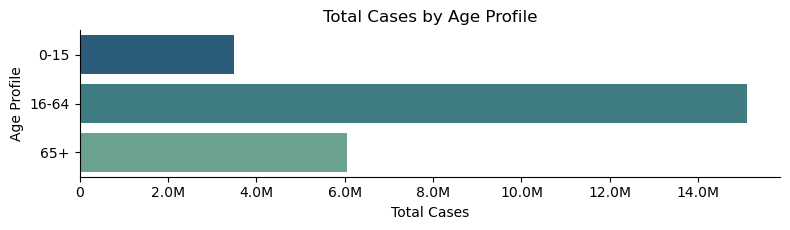

In [31]:
plt.figure(figsize=(8, 2.4))
sns.barplot(
    data=age_df,
    y='Age_Profile',
    x='Total',
    palette='crest_r'
)

# formatting the xaxis values
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Total Cases by Age Profile')
plt.xlabel('Total Cases')
plt.ylabel('Age Profile')

sns.despine()
plt.tight_layout()
plt.show()



**Overview**

    This horizontal bar chart breaks down healthcare cases across three age groups:

- Age 16–64
    - Represents the **largest share**, with **over 15 million cases**.
    - Reflects the active working-age population, likely experiencing diverse healthcare needs: **occupational injuries, chronic conditions, elective surgeries**, and preventive care.

- Age 65+
    - Accounts for around **6 million cases**.
    - Indicative of an aging population with higher frequency of **chronic illnesses, surgeries, and specialist care** (e.g., cardiology, orthopedics).

- Age 0–15
    - The lowest volume at **under 4 million cases**.
    - Still a significant number, reflecting **pediatric care** needs such as vaccinations, respiratory conditions, and ENT issues.

---


### **Segment Insights:**
-   1- Time Band vs Case Type:
    -   Day Cases & Inpatient Cases.
    -   Outpatient Cases.


In [32]:
df['Time_Bands'] = df['Time_Bands'].replace('18 Months +', '18+ Months')
df['Time_Bands'].unique()

array(['0-3 Months', '9-12 Months', '12-15 Months', '6-9 Months',
       '3-6 Months', '15-18 Months', '18+ Months', nan], dtype=object)

In [33]:
time_band_ordered = ['0-3 Months', '3-6 Months', '6-9 Months', '9-12 Months', '12-15 Months', '15-18 Months', '18+ Months']

In [34]:
time_band_df = df.groupby(['Time_Bands', 'Case_Type'])['Total'].sum().reset_index()
time_band_df.head()

,Time_Bands,Case_Type,Total
0,0-3 Months,Day Case,782718
1,0-3 Months,Inpatient,261174
2,0-3 Months,Outpatient,5940446
3,12-15 Months,Day Case,114064
4,12-15 Months,Inpatient,57880


In [35]:
df_time_band_pivot = time_band_df.pivot(columns='Case_Type', index='Time_Bands', values='Total').reset_index()
df_time_band_pivot['Time_Bands'] = pd.Categorical(df_time_band_pivot['Time_Bands'], categories=time_band_ordered, ordered=True)
df_time_band_pivot.head(2)

Case_Type,Time_Bands,Day Case,Inpatient,Outpatient
0,0-3 Months,782718,261174,5940446
1,12-15 Months,114064,57880,1675924


In [ ]:
# df to be melted and reshaped for plotting
df_melted = df_time_band_pivot.melt(id_vars='Time_Bands',
                                    value_vars=df_time_band_pivot.columns[1:-1], # Exclude the first and last columns 
                                    var_name='Case Type',
                                    value_name='Total Cases')

df_melted.head(2)

,Time_Bands,Case Type,Total Cases
0,0-3 Months,Day Case,782718
1,12-15 Months,Day Case,114064


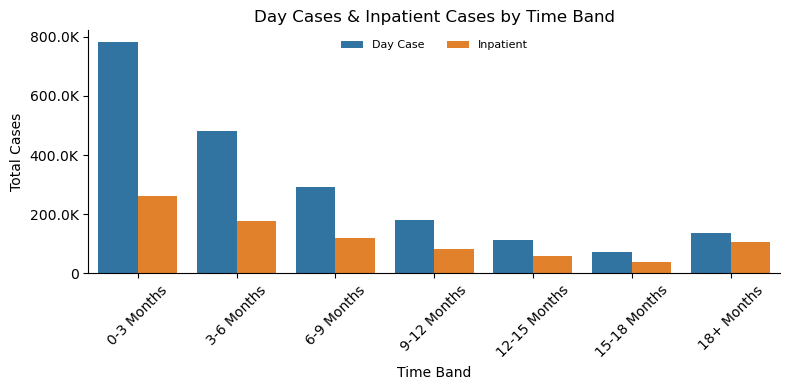

In [41]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_melted,
    x='Time_Bands',
    y='Total Cases',
    hue='Case Type',
    palette='tab10'
)

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Day Cases & Inpatient Cases by Time Band')
plt.xlabel('Time Band')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(ncols=3, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

**Insights**:
-   Early Treatment Dominance
    - **0–3 Months**: The majority of both **Day Cases (~800K)** and **Inpatients (~270K)** occur within this window.
    - Reflects **prompt access to care** post-referral, particularly for less complex treatments.

-   Declining Trend Over Time
    - Both case types **decrease steadily** across subsequent time bands (3–6, 6–9, etc.).
    - Suggests that **delays in care** reduce case volume or possibly shift to long-term pathways.

-   18+ Months
    - A notable uptick in **both Day Case and Inpatient** cases is seen in the **18+ Months** band.
    - Indicates a **backlog or long-waiting patients**, which may require prioritization.

---

In [45]:
df_melted_outpatient = df_time_band_pivot.melt(id_vars='Time_Bands',
                                    value_vars=df_time_band_pivot.columns[3:], # Exclude the first 3 columns
                                    var_name='Case Type',
                                    value_name='Total Cases')
df_melted_outpatient.head(2)

,Time_Bands,Case Type,Total Cases
0,0-3 Months,Outpatient,5940446
1,12-15 Months,Outpatient,1675924


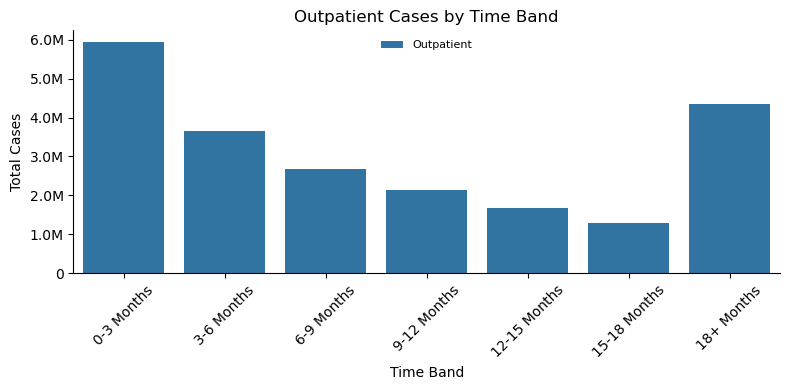

In [47]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_melted_outpatient,
    x='Time_Bands',
    y='Total Cases',
    hue='Case Type',
    palette='tab10'
)

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Outpatient Cases by Time Band')
plt.xlabel('Time Band')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(ncols=3, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

**Insights**
-   Strong Start
    - **0–3 Months** sees the **highest volume** (~6M cases), indicating strong early service responsiveness for outpatient care.

-   Gradual Decline
    - There is a **steady drop** from **3–6 Months (~3.7M)** to **15–18 Months (~1.3M)**.
    - Suggests many patients are treated earlier in the timeline.
    - May reflect **effective triage or short-term needs** being prioritized.

-   Noticeable Rise in 18+ Months
    - A significant **uptick (~4.3M cases)** occurs in the **18+ Months** band.
    - Implies a **backlog of long-waiting patients** or **deferred outpatient services**.
    - This echoes patterns seen in Day Case and Inpatient plots.

---

### **Segment Insights:**
-   2- Adult vs Child Cases:


In [ ]:
child_vs_adult = df['Adult_Child'].value_counts().to_frame().reset_index()
child_vs_adult = child_vs_adult[child_vs_adult['Adult_Child'].isin(['Adult', 'Child'])]

child_vs_adult

,Adult_Child,count
0,Adult,368151
1,Child,84665


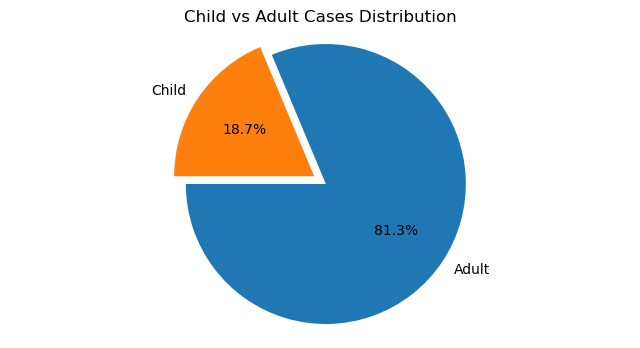

In [ ]:
# Example explode if not defined already
explode = [0.05] * len(child_vs_adult)  # Slightly pop out all slices

plt.figure(figsize=(8, 4))

plt.pie(
    x=child_vs_adult['count'],
    labels=child_vs_adult['Adult_Child'],
    colors=sns.color_palette('tab10', n_colors=len(child_vs_adult)),
    autopct='%1.1f%%',
    startangle=180,
    explode=explode,
    textprops={'fontsize': 10}  # Optional: adjust font size
)

plt.title('Child vs Adult Cases Distribution', fontsize=12)
plt.axis('equal')  # equal aspect ratio ensures the pie is circular
plt.show()

**Insights**
-   🔹 Adult-Dominated Caseload
        - **Adults account for 81.3%** of total cases.
        - Reflects the **greater healthcare demand** from the adult population.
        - Likely influenced by chronic conditions, preventative care, and age-related needs.

-   🔸 Child Segment
        - **Children make up 18.7%** of the cases.
        - Though smaller, this segment is still **significant**, especially for planning pediatric resources.

---

In [79]:
adult_vs_child_df = df.groupby(['Month_Name','Adult_Child'])['Total'].sum()
adult_vs_child_df.dropna(inplace=True)
adult_vs_child_df = adult_vs_child_df.reset_index()
adult_vs_child_df['Month_Name'] = adult_vs_child_df['Month_Name'].str[:3] # to abbreviate the month name to the first 3 letters
adult_vs_child_df['Month_Name'] = pd.Categorical(adult_vs_child_df['Month_Name'], categories=month_order, ordered=True)
adult_vs_child_df = adult_vs_child_df[adult_vs_child_df['Adult_Child'].isin(['Adult', 'Child'])]
adult_vs_child_df

,Month_Name,Adult_Child,Total
1,Apr,Adult,1584460
2,Apr,Child,278210
4,Aug,Adult,1639213
5,Aug,Child,275741
7,Dec,Adult,1618434
8,Dec,Child,266412
10,Feb,Adult,2162622
11,Feb,Child,363126
13,Jan,Adult,2144065
14,Jan,Child,362021


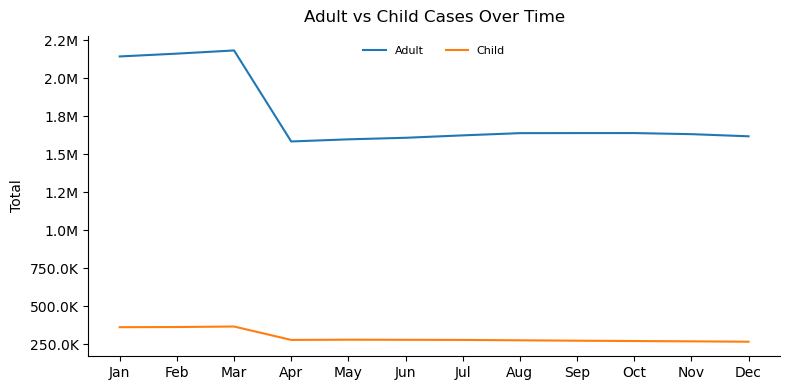

In [138]:
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=adult_vs_child_df,
    x='Month_Name',
    y='Total',
    hue='Adult_Child',
    palette='tab10'
)

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Adult vs Child Cases Over Time', pad=10)
plt.xlabel('')

plt.legend(ncols=2, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

**Insights**

- 🧑 Adult Cases:
    - **Consistently higher** volume throughout the year.
    - **Notable drop in April** (~2.15M → ~1.65M cases).
      - May suggest seasonal trends, system delays, or reporting lags.
    - From May to December, volumes remain **stable with slight fluctuation** around ~1.7M.

- 👶 Child Cases:
    - Relatively **flat and stable**, hovering just under **300K per month**.
    - A dip observed in **April**, mirroring adult trend, though less dramatic.


### **Month over Month (MoM) &Year over Year (YoY) % Change in Cases:**

-   Let's create a Monthly Summary:
    -   We’ll sum Total per month, so we can compare either month-over-month or year-over-year:

In [ ]:
monthly_cases = df.groupby('Month_Name')['Total'].sum().reset_index()

# Calculate the percentage change month-over-month
monthly_cases['MoM_change_%'] = (monthly_cases['Total'].pct_change() * 100 ).round(2)
monthly_cases['MoM_change_%'] = monthly_cases['MoM_change_%'].fillna(0)  # Fill NaN values with 0 for the first month
monthly_cases['Month_Name'] = monthly_cases['Month_Name'].str[:3] # to abbreviate the month name to the first 3 letters
# month_order was defined earlier in the code
# here you can categorise and order Month_Name to plot
monthly_cases['Month_Name'] = pd.Categorical(monthly_cases['Month_Name'], categories=month_order, ordered=True)


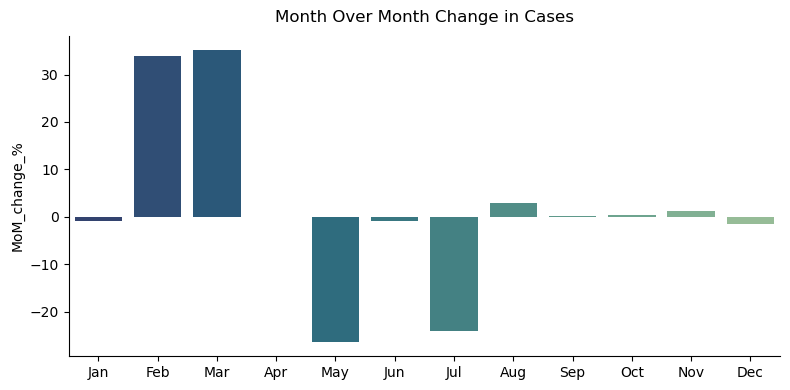

In [126]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=monthly_cases,
    x='Month_Name',
    y='MoM_change_%',
    palette='crest_r'
)

plt.title('Month Over Month Change in Cases', pad=10)
plt.xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

**Month-Over-Month (MoM) Change in Total Cases**

-   This bar chart shows the **percentage change in total cases** compared to the previous month.

- **February & March**:  
  - Over **+30% growth** each month.  
  - Indicates a **sharp surge in cases** during late Q1.

- **May & July**:
  - **-25%** MoM drop in both months.
  - Possibly due to system delays, seasonal effects, or fewer operational days.

- **August–December**:
  - Fluctuations become **minimal**, mostly between **-2% and +3%**.
  - Suggests a **steady state** of case volume entering the final quarter.

---

In [133]:
yearly_cases = df.groupby('Year')['Total'].sum().reset_index()
yearly_cases['YoY_change_%'] = (yearly_cases['Total'].pct_change() * 100 ).round(2)
yearly_cases['Year'] = yearly_cases['Year'].astype(str)  # Convert Year to string for better x-axis labels
yearly_cases['YoY_change_%'] = yearly_cases['YoY_change_%'].fillna(0)  # Fill NaN values with 0 for the first year


yearly_cases

,Year,Total,YoY_change_%
0,2018,7036731,0.00
1,2019,7495574,6.52
2,2020,7984923,6.53
3,2021,2120979,-73.44


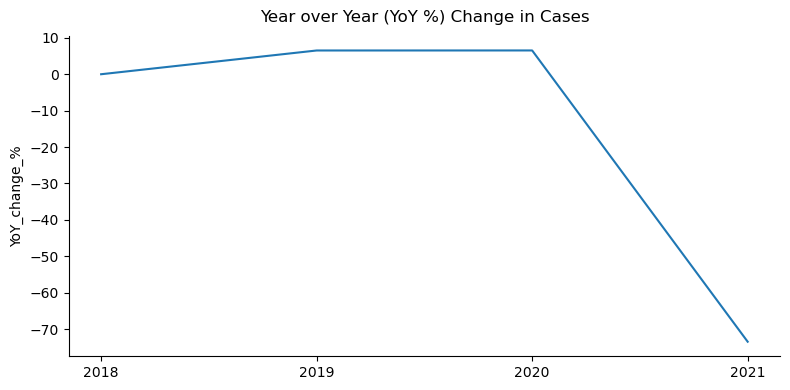

In [136]:
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=yearly_cases,
    x='Year',
    y='YoY_change_%',
    palette='crest_r'
)

plt.title('Year over Year (YoY %) Change in Cases', pad=10)
plt.xlabel('')

sns.despine()
plt.tight_layout()
plt.show()


**### **Insights**

-   **General Trend**
    - The YoY percentage change in cases starts at a relatively stable level around **0%** in 2018.
    - From 2018 to 2019, there is a slight increase, reaching a peak of approximately **+10%** in 2019.
    - In 2020, the trend reverses sharply, with a significant decline in the YoY percentage change.
    - By 2021, the YoY percentage change drops dramatically to around **-70%**, indicating a substantial decrease in cases compared to the previous year.

-   **Key Observations**
    - **Peak Growth in 2019**: The positive growth of about **+10%** indicates a notable increase in cases compared to the previous year.
    - **Sharp Decline in 2020**: The transition from a positive to a negative percentage change signifies a sudden drop in cases. This could be attributed to external factors such as changes in reporting, interventions, or other contextual events.
    - **Dramatic Drop in 2021**: The steep decline to **-70%** highlights an unprecedented reduction in cases compared to 2020. This could reflect the impact of measures like lockdowns, vaccinations, or behavioral changes.


### **Conclusion**

This analysis provided valuable insights into healthcare case trends across specialties, age groups, and time periods. Key highlights include:

- **Outpatient cases dominate**, underlining the importance of non-admitted care services.
- **Cardiology** and other high-volume specialties require focused resource planning.
- The **adult population accounts for over 80%** of cases, emphasizing the need for adult-focused healthcare services.
- A significant **YoY decline in 2021** points to external impacts such as global health events or policy changes.

Overall, this project demonstrates the power of exploratory data analysis in uncovering patterns, supporting data-driven decisions, and improving healthcare delivery systems.


---
Prepared by :   Mohamed Fawzi.

E-mail      :   modyreturn@gmail.com

Github      :   https://github.com/modyreturn

Linkedin    :   www.linkedin.com/in/mofawzirj

